In [ ]:
# pip install ultralytics    ## for YOLOvx models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
# from ultralytics import YOLO

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd/content/drive/My Drive/ship_data

/content/drive/My Drive/ship_data


In [4]:
import os
import cv2

In [5]:
path = "/content/drive/MyDrive/ship_data/images"

In [6]:
from google.colab.patches import cv2_imshow

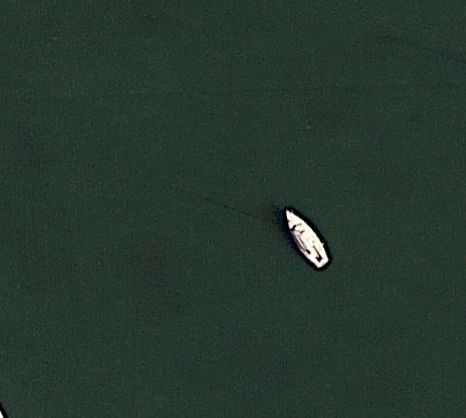

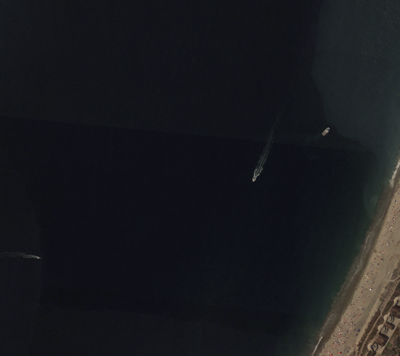

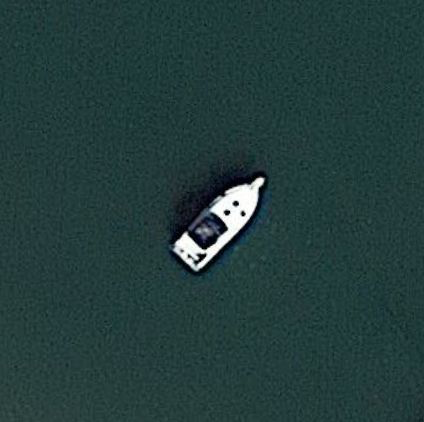

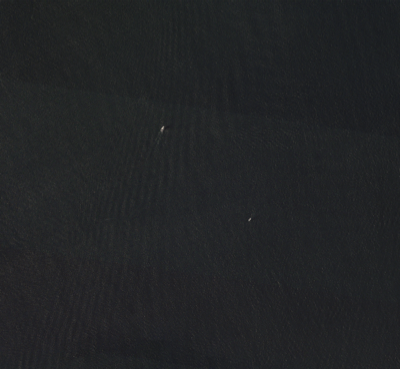

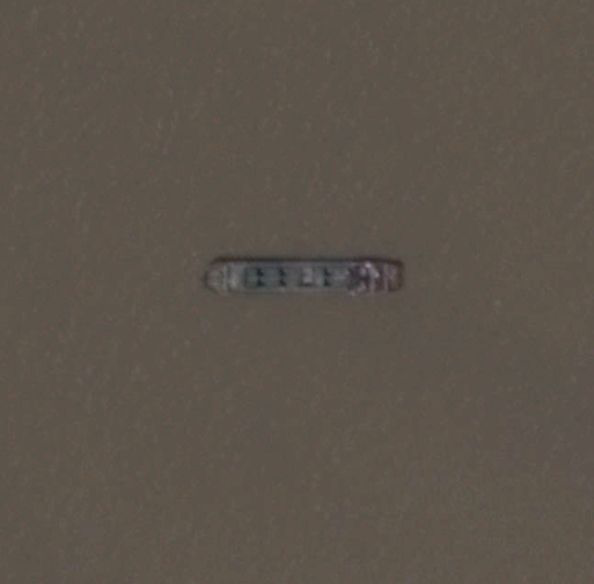

In [7]:
file_list = os.listdir(path)
count = 0
for file in file_list:
    if count >= 5:
        break
    if file.endswith('.jpg') or file.endswith('.png'):

        image = cv2.imread(os.path.join(path, file))


        cv2_imshow(image)
        count += 1

In [8]:
import seaborn as sns
from skimage.segmentation import mark_boundaries
from skimage.util import montage
from skimage.morphology import label

import gc
gc.enable()

import random
import shutil

In [9]:
original_path = "/content/drive/MyDrive/ship_data/images"
train_path = "/content/drive/My Drive/ship_data/images/train"
test_path = "/content/drive/My Drive/ship_data/images/test"

In [10]:
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

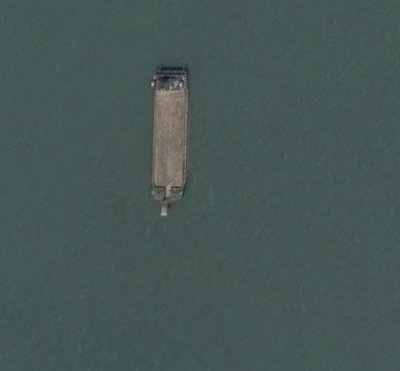

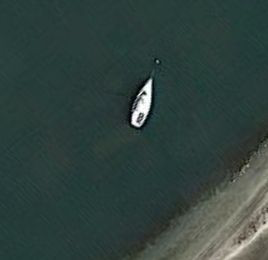

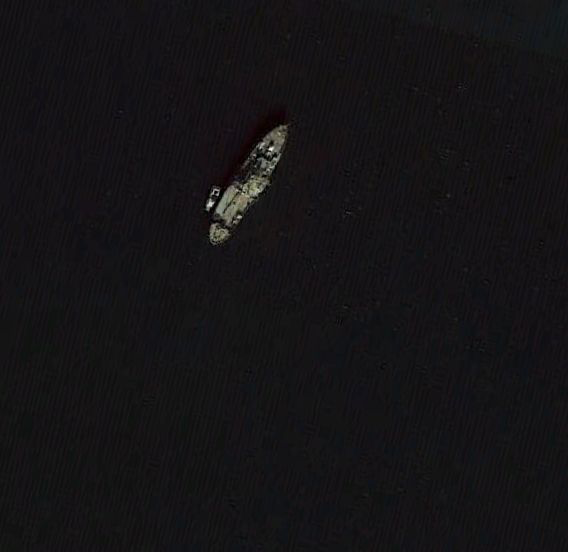

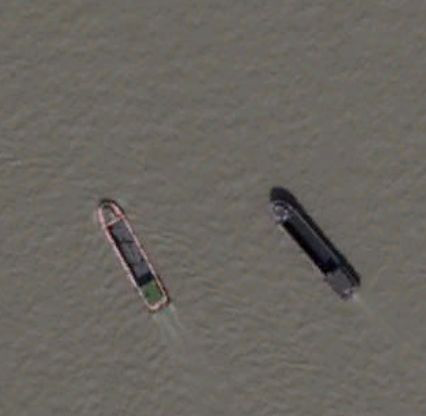

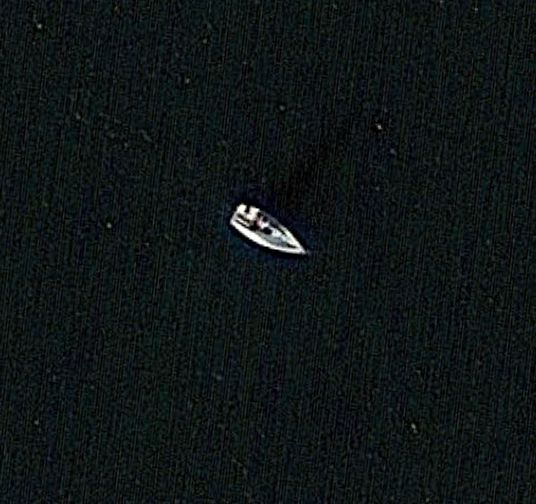

In [11]:
file_list = os.listdir(original_path)
random.shuffle(file_list)

count = 0
for file in file_list:
    if count >= 5:
        break
    if file.endswith('.jpg') or file.endswith('.png'):

        image = cv2.imread(os.path.join(original_path, file))


        cv2_imshow(image)
        count += 1

In [12]:
train_size = int(len(file_list) * 0.8)
train_files = file_list[:train_size]
test_files = file_list[train_size:]

In [13]:
for file in train_files:
    if file.endswith('.jpg') or file.endswith('.png'):
        shutil.copy(os.path.join(original_path, file), os.path.join(train_path, file))


In [14]:
for file in test_files:
    if file.endswith('.jpg') or file.endswith('.png'):
        shutil.copy(os.path.join(original_path, file), os.path.join(test_path, file))


In [15]:
print("Total images:", len(file_list))
print("Train images:", len(train_files))
print("Test images:", len(test_files))

Total images: 623
Train images: 498
Test images: 125


In [16]:
import torch
from torchvision.transforms import functional as F
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import xml.etree.ElementTree as ET

In [17]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 101MB/s] 


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [18]:
def detect_ship(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image)
    with torch.no_grad():
        prediction = model([image_tensor])
    return prediction

In [19]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        objects.append((xmin, ymin, xmax, ymax))
    return objects

In [20]:
train_dir = "/content/drive/MyDrive/ship_data/images/train"
test_dir = "/content/drive/MyDrive/ship_data/images/test"

In [ ]:
for image_file in os.listdir(train_dir):
    image_path = os.path.join(train_dir, image_file)
    prediction = detect_ship(image_path)
    # If ships are detected, save the image as "ship_detected.jpg"
    if len(prediction[0]['boxes']) > 0:
        shutil.copy(image_path, os.path.join(train_dir, "/content/drive/MyDrive/ship_data/images/train/ship_detected", image_file))

Ship Detected in boat468.png


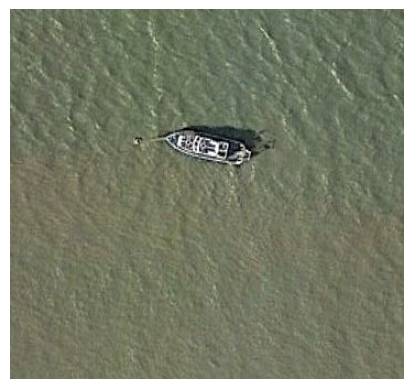

Ship Detected in boat182.png


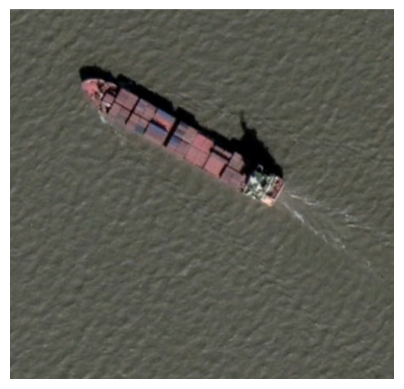

Ship Detected in boat177.png


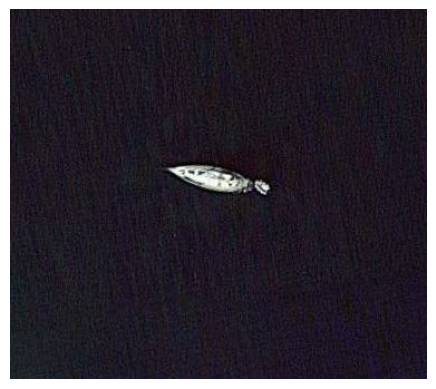

Ship Detected in boat123.png


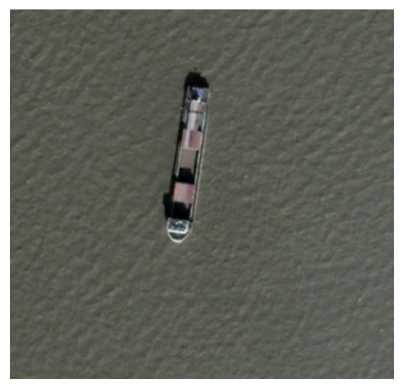

Ship Detected in boat573.png


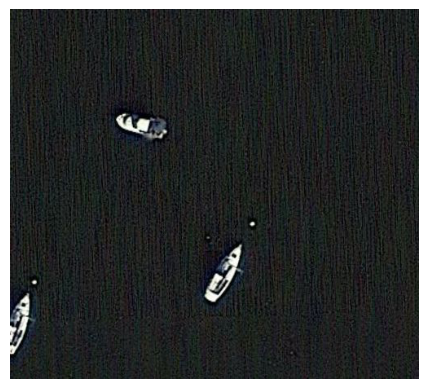

In [28]:
import random
from PIL import Image
import matplotlib.pyplot as plt

test_image_files = os.listdir(test_dir)

random_test_images = random.sample(test_image_files, k=5)
for image_file in random_test_images:
    image_path = os.path.join(test_dir, image_file)
    prediction = detect_ship(image_path)

    if len(prediction[0]['boxes']) > 0:
        print(f"Ship Detected in {image_file}")
    else:
        print(f"No Ship Detected in {image_file}")

    # Display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
